# **IMPORTANDO AS BILBIOTECAS**

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math

# **CRIANDO O DATAFRAME**

* Banana:

Tamanho: O comprimento médio de uma banana pode variar entre 15 a 25 centímetros, dependendo da variedade.
Peso: Em média, uma banana madura pode pesar entre 120 a 200 gramas.

* Coco Verde:

Tamanho: O tamanho médio de um coco verde pode variar entre 20 a 30 centímetros de diâmetro.
Peso: Em média, um coco verde pode pesar cerca de 1,5 a 2,5 kg (1500 a 2500 gramas). 

In [14]:
tamanho = []
peso = []

banana = 0
coco = 1

for i in range(50):
    cm = random.randint(15, 25)
    tamanho.append(cm)
    g = random.randint(120, 200)
    peso.append(g)
    
banana_df = pd.DataFrame({'tamanho': tamanho, 'peso': peso, 'fruta': banana})

tamanho = []
peso = []

for i in range(50):
    cm = random.randint(20, 30)
    tamanho.append(cm)
    g = random.randint(1500, 2500)
    peso.append(g)
    
coco_df = pd.DataFrame({'tamanho': tamanho, 'peso': peso, 'fruta': coco})

treinamento_df = pd.concat([banana_df, coco_df])
treinamento_df = treinamento_df.sample(frac=1).reset_index(drop=True)

# **CRIANDO A REDE NEURAL**

In [15]:
# ------------------------------------------------------------------------------------------------------------------------------------------------ #

# Função de ativação sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ------------------------------------------------------------------------------------------------------------------------------------------------ #

# Função de classificação da fruta
def classificar_fruta(tamanho, peso):

    # Calculando a soma ponderada
    weighted_sum = w1 * tamanho + w2 * peso + b

    # Aplicando a função de ativação sigmoid
    output = sigmoid(weighted_sum)

    return output

# ------------------------------------------------------------------------------------------------------------------------------------------------ #

w1 = 0.2  # Peso para o tamanho da fruta
w2 = 0.4  # Peso para o peso da fruta
b = -0.5  # Bias 

# ------------------------------------------------------------------------------------------------------------------------------------------------ #

# Lista para armazenar os valores do gradiente
gradiente_w1 = []
gradiente_w2 = []
gradiente_b = []

# ------------------------------------------------------------------------------------------------------------------------------------------------ #

# Treinamento da rede neural
for i in range(1000):
    for i, data in treinamento_df.iterrows():
        tamanho = data['tamanho']
        peso = data['peso']
        fruta = data['fruta']
        
        classificação = classificar_fruta(tamanho, peso)
        erro = fruta - classificação
    
        # Atualizando os pesos
        learning_rate = 0.1
        w1 += learning_rate * erro * tamanho
        w2 += learning_rate * erro * peso
        b += learning_rate * erro
        
        # Armazenando os valores do gradiente
        gradiente_w1.append(w1)
        gradiente_w2.append(w2)
        gradiente_b.append(b)
        
# ------------------------------------------------------------------------------------------------------------------------------------------------ #

tamanho_teste = int(input("Insira o tamanho da fruta: "))
peso_teste = int(input("Insira o peso da fruta: "))

# ------------------------------------------------------------------------------------------------------------------------------------------------ #

classificação = classificar_fruta(tamanho_teste, peso_teste)
if classificação > 0.5:
    print("Classificação:", classificação, "- Sou um coco")
else:
    print("Classificação:", classificação, "- Sou uma banana")

# ------------------------------------------------------------------------------------------------------------------------------------------------ #

/tmp/ipykernel_32/3601076216.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Insira o tamanho da fruta:  15
Insira o peso da fruta:  700


Classificação: 1.0 - Sou um coco


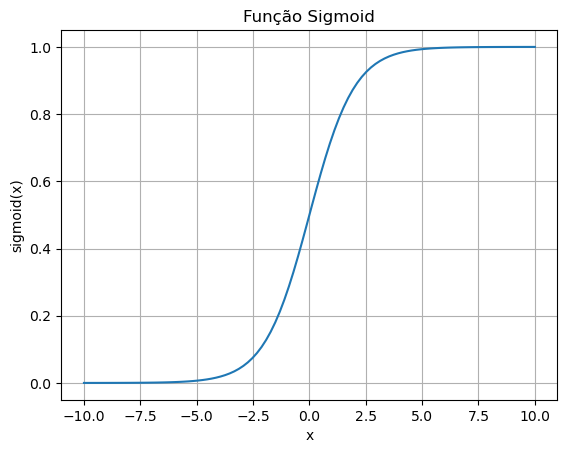

In [16]:
# Gerar valores de x no intervalo desejado
x = np.linspace(-10, 10, 100)

# Calcular os valores de sigmoid para cada valor de x
y = sigmoid(x)

# Plotar a função sigmoid
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Função Sigmoid')
plt.grid(True)
plt.show()

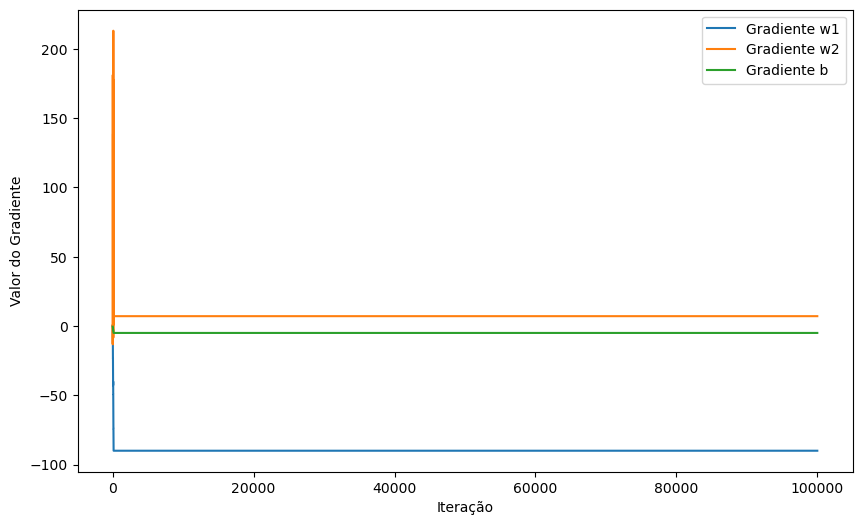

In [17]:
# Plotando o gradiente
plt.figure(figsize=(10, 6))
plt.plot(gradiente_w1, label='Gradiente w1')
plt.plot(gradiente_w2, label='Gradiente w2')
plt.plot(gradiente_b, label='Gradiente b')
plt.xlabel('Iteração')
plt.ylabel('Valor do Gradiente')
plt.legend()
plt.show()